In [2]:
# Fonte da base de dados: https://archive.ics.uci.edu/dataset/2/adult
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

base_census = pd.read_csv('src/census.csv')

In [3]:
base_census['clienteID'] = base_census.reset_index().index
display(base_census)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,clienteID
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,3
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,32556
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,32557
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,32558
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,32559


In [4]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income', 'clienteID'],
      dtype='object')

In [5]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week,clienteID
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,16280.000000
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,9399.695394
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,8140.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,16280.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,24420.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,32560.000000


In [6]:
np.unique(base_census['education'], return_counts=True)

(array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([  933,  1175,   433,   168,   333,   646,   514,  1067,  1382,
         5355,   413, 10501,  1723,    51,   576,  7291], dtype=int64))

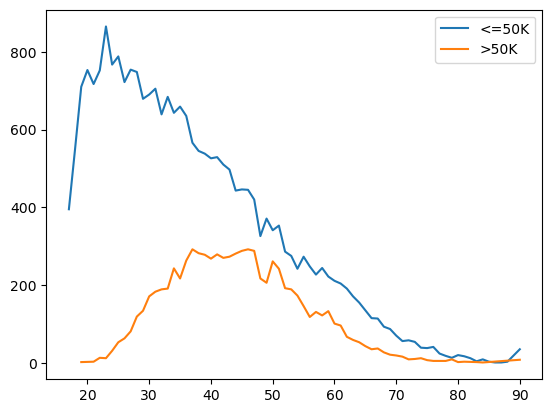

In [7]:
menor = base_census.loc[base_census['income'] == ' <=50K']
maior = base_census.loc[base_census['income'] == ' >50K']
counts_by_age_menor = menor['age'].value_counts().sort_index()
counts_by_age_maior = maior['age'].value_counts().sort_index()
sns.lineplot(x=counts_by_age_menor.index, y=counts_by_age_menor.values, label='<=50K')
sns.lineplot(x=counts_by_age_maior.index, y=counts_by_age_maior.values, label='>50K')
plt.legend()
plt.show()


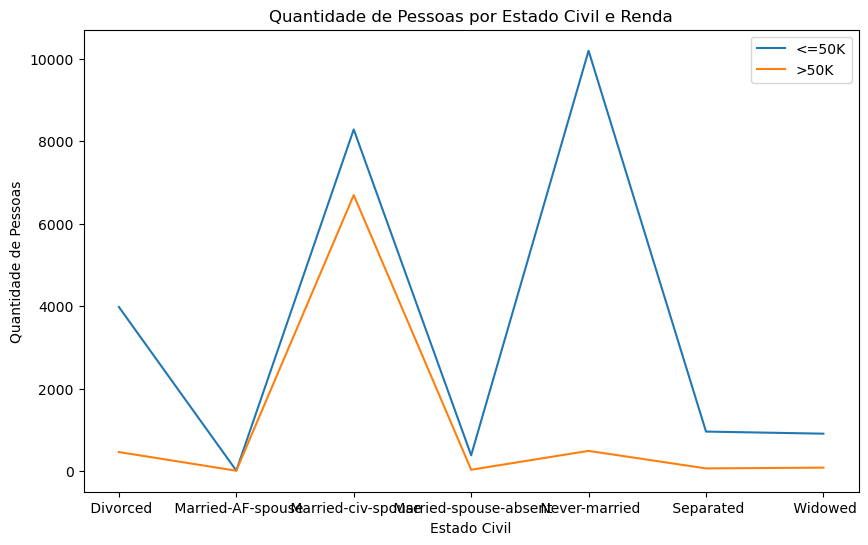

In [8]:

# Filtrar dados para income <=50K e >50K
menor = base_census.loc[base_census['income'] == ' <=50K']
maior = base_census.loc[base_census['income'] == ' >50K']

# Contar ocorrências de 'marital-status' para cada renda
counts_by_age_menor = menor['marital-status'].value_counts().sort_index()
counts_by_age_maior = maior['marital-status'].value_counts().sort_index()

# Criar DataFrame para plotagem
plot_data = pd.DataFrame({
    'Estado Civil': counts_by_age_menor.index,
    '<=50K': counts_by_age_menor.values,
    '>50K': counts_by_age_maior.values
})

# Plotar os gráficos de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='Estado Civil', y='<=50K', label='<=50K')
sns.lineplot(data=plot_data, x='Estado Civil', y='>50K', label='>50K')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade de Pessoas')
plt.title('Quantidade de Pessoas por Estado Civil e Renda')
plt.legend()
plt.show()

In [9]:
ocupacao = px.treemap(base_census, path=['occupation', 'income'])
ocupacao.show()

In [12]:
x_census = base_census.iloc[:, 0:14].values
y_census = base_census.iloc[:, 14].values